In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import seaborn as sns

## Data Pre-Processing

In [2]:
# reading the csv file
credit_data = pd.read_csv("Credit_Card.csv")

In [3]:
credit_data.head(5)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [4]:
credit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [5]:
credit_data.shape

(8950, 18)

In [6]:
# Descriptive analysis of credit card data
credit_data.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [7]:
credit_data['CREDIT_LIMIT'].isnull().value_counts()

False    8949
True        1
Name: CREDIT_LIMIT, dtype: int64

In [8]:
print (credit_data ['CREDIT_LIMIT'].describe())

count     8949.000000
mean      4494.449450
std       3638.815725
min         50.000000
25%       1600.000000
50%       3000.000000
75%       6500.000000
max      30000.000000
Name: CREDIT_LIMIT, dtype: float64


In [9]:
credit_data[credit_data['CREDIT_LIMIT'].isnull()]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
5203,C15349,18.400472,0.166667,0.0,0.0,0.0,186.853063,0.0,0.0,0.0,0.166667,1,0,NaN,9.040017,14.418723,0.0,6


### Filling the missing values

In [10]:
credit_data.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

Since there are missing values in the data, imputing them with Median

In [11]:
credit_data['CREDIT_LIMIT'].fillna(credit_data['CREDIT_LIMIT'].median(), inplace=True)
credit_data['MINIMUM_PAYMENTS'].fillna(credit_data['MINIMUM_PAYMENTS'].median(), inplace=True)

In [12]:
credit_data.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

* from the above cell we can see that the missing values are replaced

### DERIVING THE KEY PERFORMANCE INDICATORS

#### 1(a). Monthly Average Purchase, Monthly Average Cash Advance Amount


In [13]:
credit_data['Monthly_Average_Purchase'] = credit_data['PURCHASES']/credit_data['TENURE']
credit_data['Monthly_Average_CashAdvance']= credit_data['CASH_ADVANCE']/credit_data['TENURE']

In [14]:
credit_data['Monthly_Average_Purchase'].head()

0      7.950000
1      0.000000
2     64.430833
3    124.916667
4      1.333333
Name: Monthly_Average_Purchase, dtype: float64

In [15]:
credit_data['Monthly_Average_CashAdvance'].head()

0      0.000000
1    536.912124
2      0.000000
3     17.149001
4      0.000000
Name: Monthly_Average_CashAdvance, dtype: float64

#### 1(b). Purchases by type (One-Off, Installments)

In [16]:
credit_data.loc[:, ['ONEOFF_PURCHASES','INSTALLMENTS_PURCHASES']].head(10)

,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES
0,0.00,95.40
1,0.00,0.00
2,773.17,0.00
3,1499.00,0.00
4,16.00,0.00
5,0.00,1333.28
6,6402.63,688.38
7,0.00,436.20
8,661.49,200.00
9,1281.60,0.00


* We can observe 4 purchase behaviours from the data

1. People who do not do any purchases

In [17]:
credit_data[(credit_data['ONEOFF_PURCHASES']==0) & (credit_data['INSTALLMENTS_PURCHASES']==0)].shape
            

(2042, 20)

2. People who do both type of purchases

In [18]:
credit_data[(credit_data['ONEOFF_PURCHASES']>0) & (credit_data['INSTALLMENTS_PURCHASES']>0)].shape
            

(2774, 20)

3. People who do only One-Off Purchases

In [19]:
credit_data[(credit_data['ONEOFF_PURCHASES']>0) & (credit_data['INSTALLMENTS_PURCHASES']==0)].shape
            

(1874, 20)

4. People who do only Installment Purchases

In [20]:
credit_data[(credit_data['ONEOFF_PURCHASES']==0) & (credit_data['INSTALLMENTS_PURCHASES']>0)].shape
            

(2260, 20)

##### Deriving a Categorial Variable based on behaviour of the payments

In [21]:
def purchase(credit_data):
  if (credit_data ['ONEOFF_PURCHASES']==0) & (credit_data['INSTALLMENTS_PURCHASES']==0):
    return 'none'
  if (credit_data ['ONEOFF_PURCHASES']>0) & (credit_data['INSTALLMENTS_PURCHASES']>0):
    return 'both' 
  if (credit_data ['ONEOFF_PURCHASES']>0) & (credit_data['INSTALLMENTS_PURCHASES']==0):
    return 'one-off' 
  if (credit_data ['ONEOFF_PURCHASES']==0) & (credit_data['INSTALLMENTS_PURCHASES']>0):
    return 'installments' 


In [22]:
credit_data['purchase_type'] = credit_data.apply(purchase,axis=1)

In [23]:
credit_data['purchase_type'].value_counts()

both            2774
installments    2260
none            2042
one-off         1874
Name: purchase_type, dtype: int64

#### 1(c) Limit Usage (balance to credit limit ratio)

In [24]:
credit_data['limit_usage'] = credit_data.apply(lambda x: x['BALANCE']/x['CREDIT_LIMIT'], axis=1)

In [25]:
credit_data['limit_usage'].head()

0    0.040901
1    0.457495
2    0.332687
3    0.222223
4    0.681429
Name: limit_usage, dtype: float64

#### 1(d) Payments to Minimum Payments Ratio

In [26]:
credit_data['pay_min-pay'] = credit_data.apply(lambda x: x['PAYMENTS']/x['MINIMUM_PAYMENTS'], axis=1)

In [27]:
credit_data['pay_min-pay'].head()

0    1.446508
1    3.826241
2    0.991682
3    0.000000
4    2.771075
Name: pay_min-pay, dtype: float64

In [28]:
credit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 23 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

##### Applying log transformation to remove the outliers

In [29]:
credit_log = credit_data.drop(['CUST_ID','purchase_type'], axis=1).applymap(lambda x: np.log(x+1))

In [30]:
credit_log.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Monthly_Average_Purchase,Monthly_Average_CashAdvance,limit_usage,pay_min-pay
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,6.161637,0.619940,4.899647,3.204274,3.352403,3.319086,0.361268,0.158699,0.270072,0.113512,0.817570,1.894731,8.094825,6.624540,5.916079,0.117730,2.519680,3.050877,2.163970,0.296081,1.357600
std,2.013303,0.148590,2.916872,3.246365,3.082973,3.566298,0.277317,0.216672,0.281852,0.156716,1.009316,1.373856,0.819629,1.591763,1.169929,0.211617,0.130367,2.002823,2.429741,0.250303,0.940149
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.931826,0.000000,0.018982,0.000000,1.945910,0.000000,0.000000,0.000000,0.000000
25%,4.861995,0.635989,3.704627,0.000000,0.000000,0.000000,0.080042,0.000000,0.000000,0.000000,0.000000,0.693147,7.378384,5.951361,5.146667,0.000000,2.564949,1.481458,0.000000,0.040656,0.648817
50%,6.773521,0.693147,5.892417,3.663562,4.499810,0.000000,0.405465,0.080042,0.154151,0.000000,0.000000,2.079442,8.006701,6.754489,5.747301,0.000000,2.564949,3.494587,0.000000,0.264455,1.109459
75%,7.628099,0.693147,7.013133,6.360274,6.151961,7.016449,0.650588,0.262364,0.559616,0.200671,1.609438,2.890372,8.779711,7.550732,6.671670,0.133531,2.564949,4.587295,4.606022,0.540911,1.953415
max,9.854515,0.693147,10.800403,10.615512,10.021315,10.760839,0.693147,0.693147,0.693147,0.916291,4.820282,5.883322,10.308986,10.834125,11.243832,0.693147,2.564949,8.315721,8.276166,2.827902,8.830767


In [31]:
col=['BALANCE','PURCHASES','CASH_ADVANCE','TENURE','PAYMENTS','MINIMUM_PAYMENTS','PRC_FULL_PAYMENT','CREDIT_LIMIT']
credit_pre=credit_log[[x for x in credit_log.columns if x not in col ]]

#### Average minimum payment to payment ratio for each payment type

In [32]:
x = credit_data.groupby('purchase_type').apply(lambda x: np.mean(x['pay_min-pay']))
type(x)
x.values

array([ 7.23698216, 13.2590037 , 10.08745106,  5.57108156])

Text(0.5, 1.0, 'Mean payment_minpayment ratio for each purchse type')

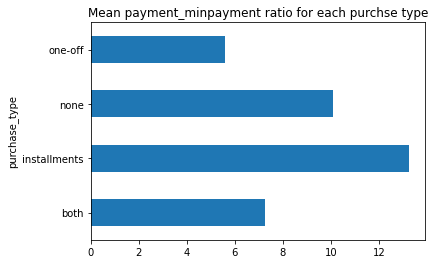

In [33]:
ax = x.plot.barh(x='x', y='x.index')
plt.title('Mean payment_minpayment ratio for each purchse type')

In [34]:
credit_data.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Monthly_Average_Purchase,Monthly_Average_CashAdvance,limit_usage,pay_min-pay
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.282473,1733.143852,844.906767,0.153715,11.517318,86.175173,88.977984,0.388884,9.059164
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.646702,2895.063757,2332.792322,0.292499,1.338331,180.508787,193.136115,0.389722,118.180526
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,170.857654,0.000000,12.000000,3.399375,0.000000,0.041494,0.913275
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000,31.936667,0.000000,0.302720,2.032717
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,788.713501,0.142857,12.000000,97.228333,99.085196,0.717571,6.052729
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000,4086.630833,3928.100980,15.909951,6840.528861


#### CUSTOMER DATA INSIGHTS

#### 1. Are the customers with installment payments paying dues ?

In [35]:
credit_data[credit_data['purchase_type']=='n']

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Monthly_Average_Purchase,Monthly_Average_CashAdvance,purchase_type,limit_usage,pay_min-pay


Text(0.5, 1.0, 'Average cash advance taken by customers of different Purchase type')

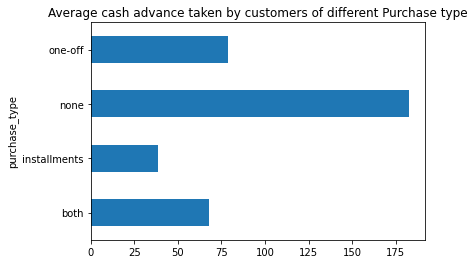

In [36]:
credit_data.groupby('purchase_type').apply(lambda x: np.mean(x['Monthly_Average_CashAdvance'])).plot.barh()
plt.title('Average cash advance taken by customers of different Purchase type')

#### 2. Customers who don't do either of the purchases takes more cash in advance

Text(0.5, 1.0, 'customers who take more cash in advance of different Purchase type')

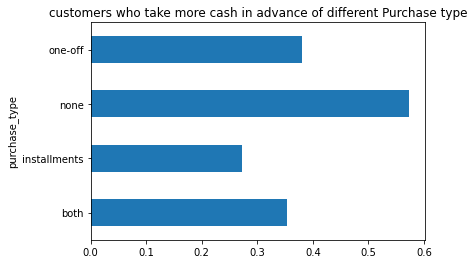

In [37]:
credit_data.groupby('purchase_type').apply(lambda x: np.mean(x['limit_usage'])).plot.barh()
plt.title('customers who take more cash in advance of different Purchase type')

In [38]:
# Original dataset with categorical column converted to number type.
credit_original=pd.concat([credit_data,pd.get_dummies(credit_data['purchase_type'])],axis=1)

In [39]:
# creating dummies for categorial variable purchase_type
credit_pre['purchase_type'] = credit_data.loc[:, 'purchase_type']
pd.get_dummies(credit_pre['purchase_type']).head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,both,installments,none,one-off
0,0,1,0,0
1,0,0,1,0
2,0,0,0,1
3,0,0,0,1
4,0,0,0,1


In [40]:
credit_dummies = pd.concat([credit_pre,pd.get_dummies(credit_pre['purchase_type'])], axis=1)

In [41]:
x = ['purchase_type']

In [42]:
credit_dummies = credit_dummies.drop(x,axis=1)

In [43]:
credit_dummies.isnull().sum()

BALANCE_FREQUENCY                   0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
Monthly_Average_Purchase            0
Monthly_Average_CashAdvance         0
limit_usage                         0
pay_min-pay                         0
both                                0
installments                        0
none                                0
one-off                             0
dtype: int64

In [44]:
credit_dummies.describe()

,BALANCE_FREQUENCY,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,Monthly_Average_Purchase,Monthly_Average_CashAdvance,limit_usage,pay_min-pay,both,installments,none,one-off
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,0.619940,3.204274,3.352403,0.361268,0.158699,0.270072,0.113512,0.817570,1.894731,3.050877,2.163970,0.296081,1.357600,0.309944,0.252514,0.228156,0.209385
std,0.148590,3.246365,3.082973,0.277317,0.216672,0.281852,0.156716,1.009316,1.373856,2.002823,2.429741,0.250303,0.940149,0.462496,0.434479,0.419667,0.406893
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.635989,0.000000,0.000000,0.080042,0.000000,0.000000,0.000000,0.000000,0.693147,1.481458,0.000000,0.040656,0.648817,0.000000,0.000000,0.000000,0.000000
50%,0.693147,3.663562,4.499810,0.405465,0.080042,0.154151,0.000000,0.000000,2.079442,3.494587,0.000000,0.264455,1.109459,0.000000,0.000000,0.000000,0.000000
75%,0.693147,6.360274,6.151961,0.650588,0.262364,0.559616,0.200671,1.609438,2.890372,4.587295,4.606022,0.540911,1.953415,1.000000,1.000000,0.000000,0.000000
max,0.693147,10.615512,10.021315,0.693147,0.693147,0.693147,0.916291,4.820282,5.883322,8.315721,8.276166,2.827902,8.830767,1.000000,1.000000,1.000000,1.000000


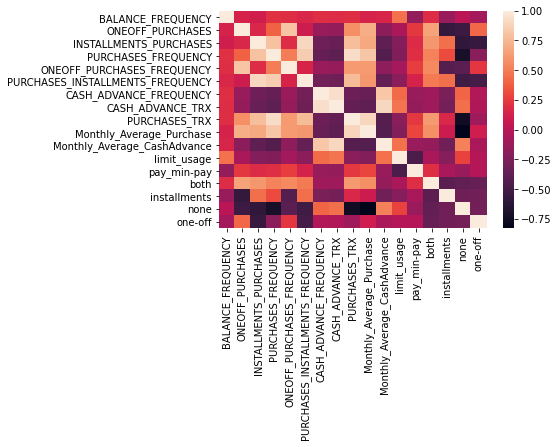

In [45]:
sns.heatmap(credit_dummies.corr())

Before applying PCA we need to standardise the data to avoid the effect of sacling. By using Centering, Scaling we can make all features with equal weights

##### Standardising the data

In [46]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
credit_scaled = sc.fit_transform(credit_dummies)

##### Applying PCA

In [47]:
from sklearn.decomposition import PCA

In [48]:
var_ratio={}
for i in range(4,15):
  pca = PCA(n_components = i)
  credit_pca = pca.fit(credit_scaled)
  var_ratio[i]=sum(credit_pca.explained_variance_ratio_)

In [49]:
pca=PCA(n_components=5)

In [50]:
p=pca.fit(credit_scaled)

In [51]:
credit_scaled.shape

(8950, 17)

In [52]:
p.explained_variance_

array([6.83574755, 3.07030693, 2.50427698, 1.38746289, 1.1138166 ])

In [53]:
var_ratio

{4: 0.8115442762351266,
 5: 0.8770555795291425,
 6: 0.9186492443512622,
 7: 0.9410925256030129,
 8: 0.9616114053683064,
 9: 0.9739787081990645,
 10: 0.9835896584630706,
 11: 0.9897248107341952,
 12: 0.9927550009135228,
 13: 0.9953907562385427,
 14: 0.9979616898169594}

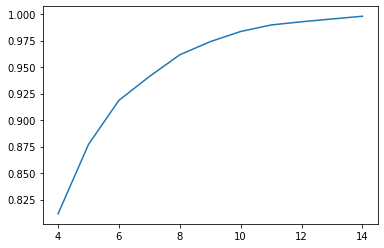

In [54]:
pd.Series(var_ratio).plot()

Since 87% of variance can be explained by the 5 components we choose 5 components to fit final PCA

In [55]:
pca_final = PCA(n_components=5).fit(credit_scaled)
reduced_credit = pca_final.fit_transform(credit_scaled)

In [56]:
df = pd.DataFrame(reduced_credit)

In [57]:
df.shape

(8950, 5)

In [58]:
column_list = credit_dummies.columns

In [59]:
column_list

Index(['BALANCE_FREQUENCY', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'Monthly_Average_Purchase',
       'Monthly_Average_CashAdvance', 'limit_usage', 'pay_min-pay', 'both',
       'installments', 'none', 'one-off'],
      dtype='object')

In [60]:
pd.DataFrame(pca_final.components_.T, columns=['PCA_' +str(i) for i in range(5)],index=column_list)

,PCA_0,PCA_1,PCA_2,PCA_3,PCA_4
BALANCE_FREQUENCY,0.029707,0.240072,-0.263140,-0.353549,-0.228681
ONEOFF_PURCHASES,0.214107,0.406078,0.239165,0.001520,-0.023197
INSTALLMENTS_PURCHASES,0.312051,-0.098404,-0.315625,0.087983,-0.002181
PURCHASES_FREQUENCY,0.345823,0.015813,-0.162843,-0.074617,0.115948
ONEOFF_PURCHASES_FREQUENCY,0.214702,0.362208,0.163222,0.036303,-0.051279
PURCHASES_INSTALLMENTS_FREQUENCY,0.295451,-0.112002,-0.330029,0.023502,0.025871
CASH_ADVANCE_FREQUENCY,-0.214336,0.286074,-0.278586,0.096353,0.360132
CASH_ADVANCE_TRX,-0.229393,0.291556,-0.285089,0.103484,0.332753
PURCHASES_TRX,0.355503,0.106625,-0.102743,-0.054296,0.104971
Monthly_Average_Purchase,0.345992,0.141635,0.023986,-0.079373,0.194147


In [61]:
# variance explained by each component

pd.Series(pca_final.explained_variance_ratio_, index= ['PCA_'+ str(i) for i in range(5)])

PCA_0    0.402058
PCA_1    0.180586
PCA_2    0.147294
PCA_3    0.081606
PCA_4    0.065511
dtype: float64

### Clustering 

In [62]:
from sklearn.cluster import KMeans
kms_4 = KMeans(n_clusters=4, random_state=123)
kms_4.fit(reduced_credit)
kms_4.labels_

array([1, 3, 2, ..., 1, 3, 2], dtype=int32)

In [63]:
pd.Series(kms_4.labels_).value_counts()

0    2758
1    2228
3    2090
2    1874
dtype: int64

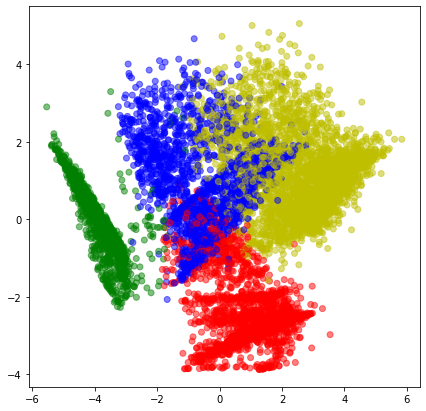

In [64]:
color_map={0:'y',1:'r',2:'b',3:'g'}
label_color=[color_map[l] for l in kms_4.labels_]
plt.figure(figsize=(7,7))
plt.scatter(reduced_credit[:,0],reduced_credit[:,1],c=label_color,cmap='Spectral',alpha=0.5)

In [65]:
df_pair_plot=pd.DataFrame(reduced_credit,columns=['PCA_' +str(i) for i in range(5)])

In [66]:
df_pair_plot['Cluster'] = kms_4.labels_

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


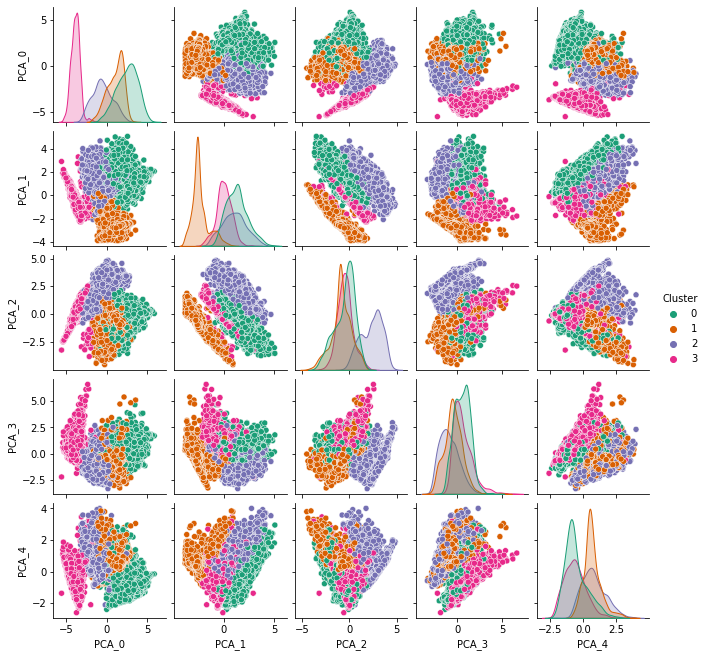

In [67]:
#pairplot for the components on the data
sns.pairplot(df_pair_plot,hue='Cluster', palette= 'Dark2', diag_kind='kde',size=1.85)

##### We can see that first two components can identify clusters

In [85]:
# Key performace variable selection . here i am dropping varibales which are used in deriving the earlier key performance indicators
columns_kpi=['PURCHASES_TRX','Monthly_Average_Purchase','Monthly_Average_CashAdvance','limit_usage','CASH_ADVANCE_TRX',
         'pay_min-pay','both','installments','one-off','none','CREDIT_LIMIT']


In [88]:
# Conactenating labels found through Kmeans with data 
cluster_df_4=pd.concat([credit_original[columns_kpi],pd.Series(kms_4.labels_,name='Cluster_4')],axis=1)

In [89]:
cluster_df_4.head()

,PURCHASES_TRX,Monthly_Average_Purchase,Monthly_Average_CashAdvance,limit_usage,CASH_ADVANCE_TRX,pay_min-pay,both,installments,one-off,none,CREDIT_LIMIT,Cluster_4
0,2,7.950000,0.000000,0.040901,0,1.446508,0,1,0,0,1000.0,1
1,0,0.000000,536.912124,0.457495,4,3.826241,0,0,0,1,7000.0,3
2,12,64.430833,0.000000,0.332687,0,0.991682,0,0,1,0,7500.0,2
3,1,124.916667,17.149001,0.222223,1,0.000000,0,0,1,0,7500.0,2
4,1,1.333333,0.000000,0.681429,0,2.771075,0,0,1,0,1200.0,2


In [90]:
# Mean value gives a good indication of the distribution of data. So we are finding mean value for each variable for each cluster
cluster_4=cluster_df_4.groupby('Cluster_4')\
.apply(lambda x: x[columns_kpi].mean()).T
cluster_4

Cluster_4,0,1,2,3
PURCHASES_TRX,33.125453,12.053860,7.118997,0.045933
Monthly_Average_Purchase,193.696083,47.573598,69.758276,0.159337
Monthly_Average_CashAdvance,67.620006,33.489846,77.843485,186.298043
limit_usage,0.354487,0.264275,0.378727,0.576217
CASH_ADVANCE_TRX,2.807107,1.019300,2.864995,6.552632
pay_min-pay,7.268605,13.402660,5.561421,9.927979
both,1.000000,0.001795,0.003735,0.002392
installments,0.000000,0.998205,0.000000,0.017225
one-off,0.000000,0.000000,0.996265,0.003349
none,0.000000,0.000000,0.000000,0.977033


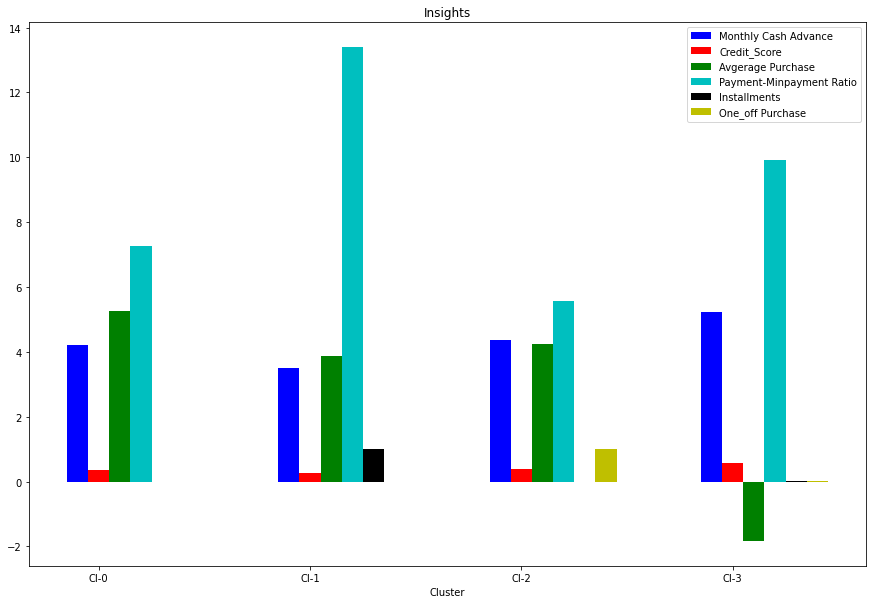

In [96]:
fig,ax=plt.subplots(figsize=(15,10))
index=np.arange(len(cluster_4.columns))

cash_advance=np.log(cluster_4.loc['Monthly_Average_CashAdvance',:].values)
credit_score=(cluster_4.loc['limit_usage',:].values)
purchase= np.log(cluster_4.loc['Monthly_Average_Purchase',:].values)
payment=cluster_4.loc['pay_min-pay',:].values
installment=cluster_4.loc['installments',:].values
one_off=cluster_4.loc['one-off',:].values


bar_width=.10
b1=plt.bar(index,cash_advance,color='b',label='Monthly Cash Advance',width=bar_width)
b2=plt.bar(index+bar_width,credit_score,color='r',label='Credit_Score',width=bar_width)
b3=plt.bar(index+2*bar_width,purchase,color='g',label='Avgerage Purchase',width=bar_width)
b4=plt.bar(index+3*bar_width,payment,color='c',label='Payment-Minpayment Ratio',width=bar_width)
b5=plt.bar(index+4*bar_width,installment,color='k',label='Installments',width=bar_width)
b6=plt.bar(index+5*bar_width,one_off,color='y',label='One_off Purchase',width=bar_width)

plt.xlabel("Cluster")
plt.title("Insights")
plt.xticks(index + bar_width, ('Cl-0', 'Cl-1', 'Cl-2', 'Cl-3'))
plt.legend()

### We can see that the Clusters are distingushing the behaviour of the customers

### Validating the Key Performance Indicators using the Clustering

#### Checking performance metrics for KMEANS

In [97]:
from sklearn.metrics import calinski_harabaz_score,silhouette_score


In [100]:
score={}
score_c={}
for n in range(3,10):
    kms_score=KMeans(n_clusters=n)
    kms_score.fit(reduced_credit)
    score_c[n]=calinski_harabaz_score(reduced_credit,kms_score.labels_)
    score[n]=silhouette_score(reduced_credit,kms_score.labels_)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function calinski_harabaz

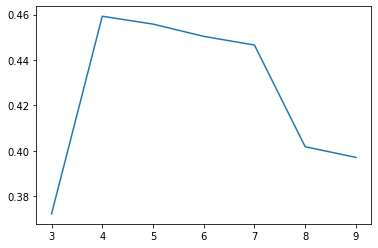

In [101]:
 pd.Series(score).plot()

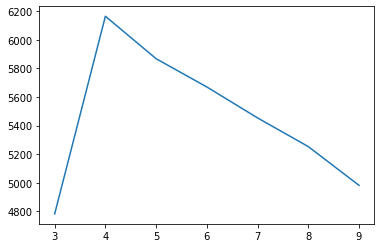

In [102]:
 pd.Series(score_c).plot()

### We can see that the K-Means with 4 clusters is distinguishing the characteristics of all the clusters

### Suggesting the Marketing Stratagies based on the K-Means Clustering

## 1. Cluster 0 : 

These are the potential customers who has been making the purchases and paying them back and also have a good credit scores when compared and these are customers for whom we can increase the credit line, decrease the interest rates and also provide premium cards.

## 2. Cluster 3 :
These are the customers who have poor credit score and taking only Cash Advances so we can provide them less interest rates the on purchase transactions


## 3. Cluster 2:
This group of customers seems to be risky making only one-off purchases and taking the cash advances may be using for utilities most probably.

## 4. Cluster 1:
This group of customers are performing well, they are making the purchases and have been paying the aggresively, we can provide these people with cash rewards and bonuses.